In [13]:
import numpy as np
import pandas as pd
from scipy.special import logit
from fairforest import d_tree
from fairforest import utils
import warnings
import matplotlib.pyplot as plt

In [14]:
warnings.simplefilter("ignore")


In [15]:
np.random.seed(0)

In [16]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [19]:
z = np.zeros(1000)
for j in range(1000):
    z[j] = np.random.binomial(1,0.5)
x_correlated = np.zeros((1000,4))
x_uncorrelated = np.zeros((1000,16))
for j in range(16):
    for i in range (1000):
        if j < 4:
            x_correlated[i][j] = (j+2)*np.random.normal((z[i] + 1), 1, 1)
        x_uncorrelated[i][j] = np.random.normal(0,1,1)
x = np.concatenate((x_correlated,x_uncorrelated),axis=1)
x = np.concatenate((x,np.reshape(z,(1000,1))),axis=1)
b = np.zeros(21)
noise = np.random.normal(0,1,1000)
for i in range (10):
    b[i] = np.random.uniform(0,5)
y = logit(NormalizeData(np.dot(x,b)) + noise.T)
for i in range (len(y)):
    if y[i] > 0:
        y[i] = int(1)
    else:
        y[i] = int(0)
column = []
for i in range(21):
    column.append(str(i+1))
dataframe = pd.DataFrame(x, columns = column)


In [20]:
model_dtree = d_tree.DecisionTree(20,0,'21',1)
model_dtree.fit(dataframe,y)



build tree for node  0
spliting
spliting done
4 1.9275115627353046
build tree for node  1
spliting
spliting done
17 1.7495400140033395
build tree for node  3
spliting
spliting done
8 2.2423670611781668
build tree for node  5
spliting
spliting done
10 -2.065298148290558
build tree for node  7
only one class for this node
build tree for node  8
spliting
spliting done
16 -1.9117461031470633
build tree for node  9
spliting
spliting done
2 4.25390929884952
build tree for node  11
only one class for this node
build tree for node  12
only one class for this node
build tree for node  10
spliting
spliting done
1 1.0726944967526606
build tree for node  13
spliting
spliting done
19 -1.1142384877090463
build tree for node  15
spliting
spliting done
1 -0.2556168376489216
build tree for node  17
only one class for this node
build tree for node  18
only one class for this node
build tree for node  16
spliting
spliting done
1 1.0681430247106412
build tree for node  19
spliting
spliting done
6 -1.60913

In [21]:
fairness_importance = model_dtree._fairness_importance()

1 0.01536098310291859
2 -0.27589515161898237
3 0.0
4 -0.14814814814814814
5 0.36363636363636365
6 -0.0318840579710145
7 0.04375
8 0.0
9 0.0
10 -0.24679186228482003
11 0.011904761904761904
12 0.0
13 0.0
14 0.11666666666666667
15 -0.036642788601013145
16 0.0
17 0.0
18 0.15827922077922077
19 0.00833333333333334
20 0.0
21 0


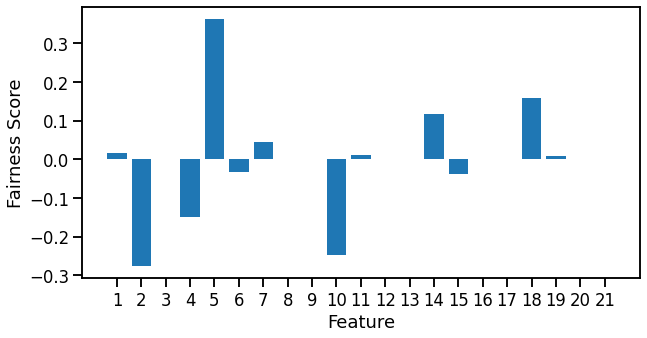

In [22]:
feature = []
score = []
for key, value in fairness_importance.items():
    print(key, value)
    feature.append(key)
    score.append((value))
utils.draw_plot(feature,score,"Results/Synthetic/eqop2.pdf")



In [23]:
model_dtree_dp = d_tree.DecisionTree(20,0,'21',2)
model_dtree_dp.fit(dataframe,y)



build tree for node  0
spliting
spliting done
4 1.9275115627353046
build tree for node  1
spliting
spliting done
17 1.7495400140033395
build tree for node  3
spliting
spliting done
8 2.2423670611781668
build tree for node  5
spliting
spliting done
10 -2.065298148290558
build tree for node  7
only one class for this node
build tree for node  8
spliting
spliting done
16 -1.9117461031470633
build tree for node  9
spliting
spliting done
2 4.25390929884952
build tree for node  11
only one class for this node
build tree for node  12
only one class for this node
build tree for node  10
spliting
spliting done
1 1.0726944967526606
build tree for node  13
spliting
spliting done
19 -1.1142384877090463
build tree for node  15
spliting
spliting done
1 -0.2556168376489216
build tree for node  17
only one class for this node
build tree for node  18
only one class for this node
build tree for node  16
spliting
spliting done
1 1.0681430247106412
build tree for node  19
spliting
spliting done
6 -1.60913

In [24]:
fairness_importance_dp = model_dtree_dp._fairness_importance()

1 -0.023523700223476777
2 -0.12432100361927233
3 -0.01610025825882252
4 -0.14085289095966236
5 0.2156280676660936
6 0.010786702292402089
7 0.02296035556413618
8 0.03359771931614623
9 -0.0748854316355334
10 -0.1036117642254851
11 0.02038646435914829
12 0.06244934703985962
13 -0.20282039080294406
14 0.0978450109674091
15 -0.006589371311138533
16 -0.06613555010990907
17 0.23886136429055027
18 0.20732886457561883
19 -0.018844240311387882
20 -0.36895383551659044
21 0


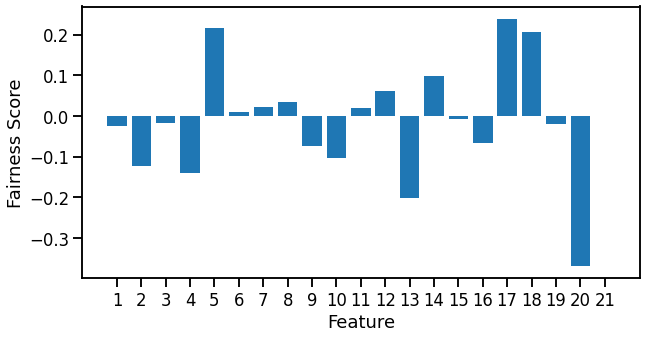

In [25]:
feature = []
score_dp = []
for key, value in fairness_importance_dp.items():
    print(key, value)
    feature.append(key)
    score_dp.append((value))
utils.draw_plot(feature,score_dp,"Results/Synthetic/DP2.pdf")


In [12]:
count_z0 = count_z1 = 0
count0 = count1 = 0
z0 = z1 = 0
for i in range (1000):
    if y[i] == 0:
        count0+=1
    else:
        count1+=1
        if x[i][20] == 0:
            count_z0 += 1
        else:
            count_z1 +=1
    if x[i][20] == 0:
        z0+=1
    else:
        z1+=1
print(count0,count1, count_z0,count_z1,z0,z1)




796 204 52 152 291 709
